# Regularization

## 1 Explain what is Regularization? 

Overfitting happens when model fits the training data very well and is not able to perform well on the unseen data.
Regularization is a technique used which fits the function appropriately on the training set and helps reduce errors by not performing overfitting.

It is always intended to reduce the generalization error, i.e. the error score with the trained model on the evaluation set and not the training data.

## 2 Explain how regularization is performed in linear regression? 

Linear Regression tries to fit the line that best fits a set of data points.

The function we want to normalize when we are fitting a linear regression model is called the loss function, which is the sum of all the squared residuals on the training data, formally called Residual Sum of Squares (RSS):
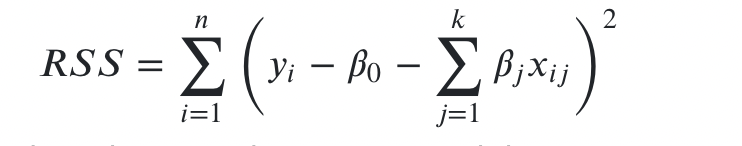

Regularization is used to constraint the estimated coefficients towards 0. This protects the model from learning excessively that can easily result overfit the training data. 

We introduce this regularization to our loss function, the RSS, by simply adding all the absolute or squared coefficients together. 

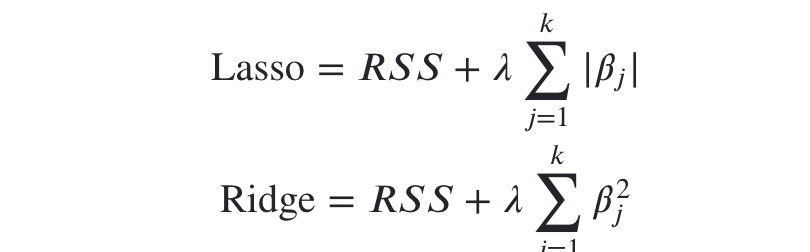

This 𝜆 is a constant we use to assign the strength of our regularization. You see if  𝜆=0 , we get linear regression with just RSS in the loss function. And if  𝜆=infinite,  the regularization term would reduce RSS resulting in all coefficients  to be zero leading in underfitting.


## 3 Explain what is Ridge and Lasso regression? 

Ridge Regression :
Also called L2 regression. In Ridge regression, we add a penalty term which is equal to the square of the coefficient. 

The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient 𝜆 to control that penalty term. As we increase the value of 𝜆, the value of the coefficient goes towards zero. They never reach 0 so number of features remain the same.

Limitation of Ridge Regression: 
Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient being 0 rather only minimizes it. Hence, this model is not good for feature reduction.

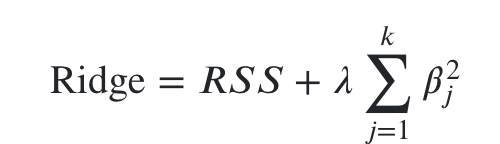

Lasso Regression :
Lasso regression stands for Least Absolute Shrinkage and Selection Operator. Also called L1 regularization. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases the value of coefficients decrease in order to reduce loss. 


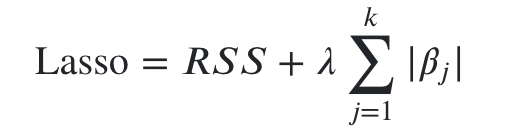

Limitation of Lasso Regression:
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data.

The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

## 4 Perform Ridge and Lasso regression continuing the task of the previous homework

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [113]:
data = load_boston()

In [114]:
#convert the data in to pandas dataframe
df_features = pd.DataFrame(data.data, columns = data.feature_names)
display(df_features)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [105]:
df_target = pd.DataFrame(data.target, columns = ['target'])
display(df_target)

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [115]:
boston_data = df_features.join(df_target)

In [116]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [122]:
boston_entire_ds = boston_data

In [132]:
#split into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(boston_entire_ds.drop(["target"],axis=1),boston_entire_ds["target"], test_size = 0.25)

print(X_train1)
print(y_train1)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
229   0.44178   0.0   6.20   0.0  0.504  6.552  21.4  3.3751   8.0  307.0   
469  13.07510   0.0  18.10   0.0  0.580  5.713  56.7  2.8237  24.0  666.0   
46    0.18836   0.0   6.91   0.0  0.448  5.786  33.3  5.1004   3.0  233.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096  96.9  3.7598   4.0  307.0   
299   0.05561  70.0   2.24   0.0  0.400  7.041  10.0  7.8278   5.0  358.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
302   0.09266  34.0   6.09   0.0  0.433  6.495  18.4  5.4917   7.0  329.0   
206   0.22969   0.0  10.59   0.0  0.489  6.326  52.5  4.3549   4.0  277.0   
343   0.02543  55.0   3.78   0.0  0.484  6.696  56.4  5.7321   5.0  370.0   
430   8.49213   0.0  18.10   0.0  0.584  6.348  86.1  2.0527  24.0  666.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093  98.0  1.8226   4.0  711.0   

     PTRATIO       B  LSTAT  
229     17.4  380.34   3.76  
469     20.2  3

In [133]:
#normalize the data
scaler1 =  MinMaxScaler()
scaler1.fit(X_train1)
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

In [142]:
#Lasso Regression
l1 = Lasso(alpha = 0.1)
l1.fit(X_train_scaled1,y_train1)
y_pred_l1 = l1.predict(X_test_scaled1)

print('r2_score Lasso = ',r2_score(y_test1,y_pred_l1))


r2_score Lasso =  0.7421653666070706


In [143]:
#Ridge Regression
r1 = Ridge(fit_intercept=False, alpha = 0.1)
r1.fit(X_train_scaled1, y_train1)
y_pred_r1 = r1.predict(X_test_scaled1) 

print('r2_score Ridge = ',r2_score(y_test1,y_pred_r1))


r2_score Ridge =  0.7587108875394636


## 5 Perform Ridge and Lasso regression on HCC.csv dataset after performing necessary pre-processing steps as mentioned in the previous homework

In [ ]:
df = pd.read_csv("HCC.csv")
df.head()

In [148]:
# Drop the first column - no significant data
df.drop(['Unnamed: 0'],axis =1)

#round all columns upto two decimals
df = df.round(decimals = 2)
display(df.head())



,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,...,2.1,34.0,41,183.0,150.0,7.1,0.7,1.0,3.5,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.4,58.0,68,202.0,109.0,7.0,2.1,5.0,13.0,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,0.4,16.0,64,94.0,174.0,8.1,1.1,2.0,15.7,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.7,147.0,306,173.0,109.0,6.9,1.8,1.0,9.0,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,...,3.5,91.0,122,242.0,396.0,5.6,0.9,1.0,10.0,0


In [162]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Class"],axis=1),df["Class"], test_size = 0.25)
                                                   

In [163]:
# feature scaling 
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
#Lasso Regression
l = Lasso(alpha = 0.1)
l.fit(X_train_scaled,y_train)
y_l = l.predict(X_test_scaled)

print('r2_score Lasso = ',r2_score(y_test,y_l))

r2_score Lasso =  -0.041495198902606445


In [158]:
#Ridge Regression
r = Ridge(fit_intercept=False, alpha = 0.1)
r.fit(X_train_scaled, y_train)
y_r = r.predict(X_test_scaled) 

print('r2_score Ridge = ',r2_score(y_test,y_r))

r2_score Ridge =  -0.1181218221147422
